# Abstract

Final project for Electronic Publishing and Digital Storytelling in fullfillment of an LM in Digital Humanities and Digital Knowledge from the University of Bologna.

## Project Aims
Wikidata is one of the largest free and open knowledge databases in the world. 
Launched in 2012, it now contains over 97 million items, over six million of them people.

This project investigates how Wikidata describes art historians and how those descriptions differ across gender.
This project serves as a case study in how our descriptions of history create history.

### Phase 1: Overview
We first wanted to get an wide view of Wikidata's data on art historians.
To do this we first queried art historians grouped by gender.

In [1]:
#insert Denise's initial query that breaks down those with art historian/sub groups into genders
from SPARQLWrapper import SPARQLWrapper, JSON, GET, POST, CSV
import csv 
import pandas as pd
import requests
import json
import ssl
import numpy as np
import pandas as pd
import string
import networkx as nx
import matplotlib.pyplot as plt
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

General_Query = """
SELECT ?genderLabel (count(distinct ?human) as ?number)
WHERE
{SERVICE wikibase:label {
     bd:serviceParam wikibase:language "en" .
   }
  ?human wdt:P31 wd:Q5
  ; wdt:P21 ?gender
  ; wdt:P106/wdt:P279* wd:Q1792450 .
}
GROUP BY ?genderLabel
"""

# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(General_Query)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
results = sparql_wd.query().convert()


#manipulate the result
for result in results["results"]["bindings"]:
    gender = result["genderLabel"]["value"]
    total = result["number"]["value"]
    
    print ("On Wikidata there are" + " " + total + " " + gender + " " + "art historians.")

On Wikidata there are 11761 male art historians.
On Wikidata there are 5881 female art historians.
On Wikidata there are 2 non-binary art historians.


Manipulation of Data

In [2]:
men = int(results["results"]["bindings"][0]['number']['value'])
women = int(results["results"]["bindings"][1]['number']['value'])
nb = int(results["results"]["bindings"][2]['number']['value'])

for result in results["results"]["bindings"]:
    #print(result["genderLabel"]["value"], result["number"]["value"])
    print (results)

{'head': {'vars': ['genderLabel', 'number']}, 'results': {'bindings': [{'genderLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'male'}, 'number': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '11761'}}, {'genderLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'female'}, 'number': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '5881'}}, {'genderLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'non-binary'}, 'number': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '2'}}]}}
{'head': {'vars': ['genderLabel', 'number']}, 'results': {'bindings': [{'genderLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'male'}, 'number': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '11761'}}, {'genderLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'female'}, 'number': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 

In [3]:
#Create CSV

with open('overview.csv', mode='w') as my_file:
    my_writer = csv.writer(my_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
    my_writer.writerow(["Gender", "Total"])
    for result in results["results"]["bindings"]:
        my_writer.writerow([result["genderLabel"]["value"], result["number"]["value"].strip()])
        


df = pd.read_csv("overview.csv")

df.index = [
    "Male Art Historian",
    "Female Art Historian",
    "Non-Binary Art Historian"
]

#get the sum of all the Art Historian on Wikidata

population = df['Total']


ArtHistorianPopulation = population.sum()

#print(ArtHistorianPopulation)

#Get the percentage on the total art historians 

percetage= (df[['Total']] / ArtHistorianPopulation)*100


print(percetage)

                              Total
Male Art Historian        66.657221
Female Art Historian      33.331444
Non-Binary Art Historian   0.011335


**For the vizaualisation of these I'll probably have a pie chart or maybe we can have 100 little figures that represent the 100% of art historian on Wikidata and represent the percentage of female, male and non binary art historian. This is very similar to what the matrioska peole did so IDK. Maybe we can just leave it as text and that's it... **

In [4]:
#insert Denise's initial query that breaks down those with art historian/sub groups into genders
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

# prepare the query : 10 random triples
my_SPARQL_query = """
SELECT ?genderLabel (count(distinct ?human) as ?number)
WHERE
{SERVICE wikibase:label {
     bd:serviceParam wikibase:language "en" .
   }
  ?human wdt:P31 wd:Q5
  ; wdt:P21 ?gender
  ; wdt:P106/wdt:P279* wd:Q1792450 .
}
GROUP BY ?genderLabel
LIMIT 10

"""

# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(my_SPARQL_query)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
results = sparql_wd.query().convert()

#men = result["genderLabel"]["male"]
# manipulate the result
for result in results["results"]["bindings"]:
    print(result["genderLabel"]["value"], result["number"]["value"])


print (results)
print("💩")
#print(results["results"]["bindings"][0]['number']['value'])
men = int(results["results"]["bindings"][0]['number']['value'])
women = int(results["results"]["bindings"][1]['number']['value'])
nb = int(results["results"]["bindings"][2]['number']['value'])
print(men)
print(women)
print(nb)

male 11761
female 5881
non-binary 2
{'head': {'vars': ['genderLabel', 'number']}, 'results': {'bindings': [{'genderLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'male'}, 'number': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '11761'}}, {'genderLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'female'}, 'number': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '5881'}}, {'genderLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'non-binary'}, 'number': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '2'}}]}}
💩
11761
5881
2


IMO this is not as strong as next query. Remove from Final Project
Then we wanted to look at the properties used to describe art historians across genders. So we ran a query to count the number of distinct properties used for each

In [13]:
#insert Sarah's query getting property counts
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

# prepare the query
my_SPARQL_query = """
SELECT ?genderLabel (count(distinct ?property) as ?number)
WHERE
{SERVICE wikibase:label {
     bd:serviceParam wikibase:language "en" .
   }

  ?human wdt:P31 wd:Q5
  ; wdt:P21 ?gender
  ; ?property ?object
  ; wdt:P106/wdt:P279* wd:Q1792450 .

}

GROUP BY ?genderLabel
"""
# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(my_SPARQL_query)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
results = sparql_wd.query().convert()

# manipulate the result
for result in results["results"]["bindings"]:
    print(result["genderLabel"]["value"], result["number"]["value"])
print("🦐")


male 2662
female 1797
non-binary 233
🦐


This query is for NOT distinct, so total number of declarations

In [26]:
#insert Sarah's query getting property counts
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

# prepare the query
my_SPARQL_query = """
SELECT ?genderLabel (count(?property) as ?number)
WHERE
{SERVICE wikibase:label {
     bd:serviceParam wikibase:language "en" .
   }

  ?human wdt:P31 wd:Q5
  ; wdt:P21 ?gender
  ; ?property ?object
  ; wdt:P106/wdt:P279* wd:Q1792450 .

}

GROUP BY ?genderLabel
"""
# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(my_SPARQL_query)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
results = sparql_wd.query().convert()

# manipulate the result
for result in results["results"]["bindings"]:
    print(result["genderLabel"]["value"], result["number"]["value"])
print("🌮")

male 1204564
female 422757
non-binary 493
🌮


###This creates the pixelated images according to number of properties

In [5]:
#get number of properties
m_prop = int((results["results"]["bindings"][0]['number']['value']))
f_prop = int((results["results"]["bindings"][1]['number']['value']))
nb_prop = int((results["results"]["bindings"][2]['number']['value']))

#divide by number of entities per gender
final_m = round((m_prop/men)/2)
final_f = round((f_prop/women)/2)
final_nb = round((nb_prop/nb)/2)

#!/usr/local/bin/python3
from PIL import Image

# Open Paddington
img_m = Image.open("man.jpg")
img_f = Image.open("woman.jpg")

# Resize smoothly down to appropriate number of pixels
img_m_sm = img_m.resize((final_m,final_m),resample=Image.BILINEAR)
img_f_sm = img_f.resize((final_f, final_f),resample=Image.BILINEAR)

# Scale back up using NEAREST to original size
result_m = img_m_sm.resize(img_m.size,Image.NEAREST)
result_f = img_f_sm.resize(img_f.size,Image.NEAREST)

# Save
result_m.save('result_m2.png')
result_f.save('result_f2.png')

print(final_m)
print(final_f)
print(final_nb)
print("📸")

FileNotFoundError: [Errno 2] No such file or directory: 'man.jpg'

## This turns the photos into gifs: 
This code needs ot be cleaned up/comments removed. Making the man and woman is separate due to the way the code is written

MovieWriter PillowWriter unavailable; using Pillow instead.


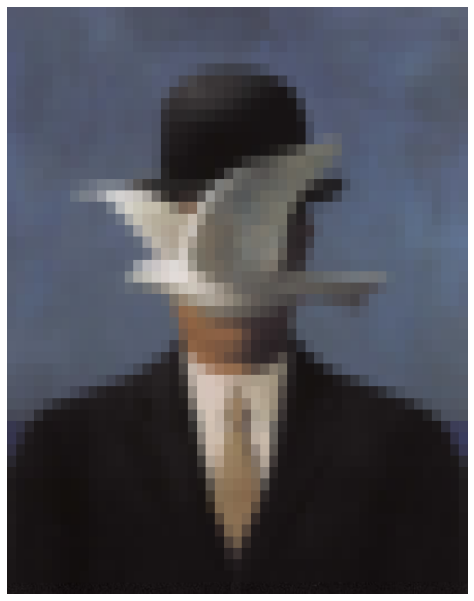

In [30]:
#This is the best one to use!!! idk why it is throwing this error: 
#This code is from: https://dev.to/finloop/animating-two-images-transitioning-into-each-other-with-matplotlib-55bg

# We'll need them later
import numpy as np
import matplotlib.pylab as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import ffmpeg
from celluloid import Camera

from PIL import Image

image1 = np.array(Image.open('man.jpg').convert('RGB'))
image2 = np.array(Image.open('result_m2.png').convert('RGB'))

fimage1 = image1.reshape((-1,3))
fimage2 = image2.reshape((-1,3))


def fade(shape, fimage1, fimage2, perc):
    i = int(fimage1.shape[0] * perc)
    return np.concatenate((fimage2[:i], fimage1[i:, :])).reshape(shape)
fig = plt.figure(figsize=(12, 10.8)) # Depends on aspect of your images
ax = plt.axes()
plt.margins(x=0)
plt.axis('off')

#plt.savefig('image.png', bbox_inches='tight',pad_inches = 0)
pic = ax.imshow(np.zeros(image1.shape)) # Create empty image of the same shape as image to plot
frames = 50 # Number of frames to generate

def init():
    pic.set_array(np.zeros(image1.shape))
    return [pic]

# This funtion generates i-th frame.
def animate(i):
    pic.set_array(fade(image1.shape, fimage1, fimage2, i/frames))
    return [pic]

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, blit=True)
#this appears to be the problem line
#anim.save('animation.mp4', fps=60, extra_args=['-vcodec', 'libx264'])
#anim.save('animation.mp4', fps=60)
anim.save('animation6.gif', writer='PillowWriter', fps=150)


#plt.show()

## Making the woman gif

MovieWriter PillowWriter unavailable; using Pillow instead.


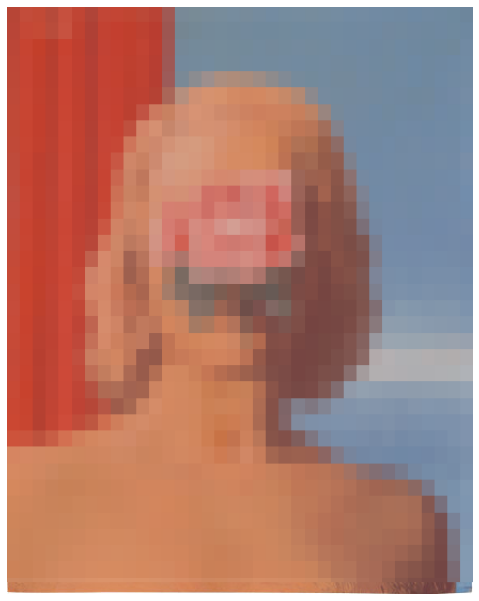

In [31]:
#This is the best one to use!!! idk why it is throwing this error: 
#This code is from: https://dev.to/finloop/animating-two-images-transitioning-into-each-other-with-matplotlib-55bg

# We'll need them later
import numpy as np
import matplotlib.pylab as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import ffmpeg
from celluloid import Camera

from PIL import Image

image1 = np.array(Image.open('woman.jpg').convert('RGB'))
image2 = np.array(Image.open('result_f2.png').convert('RGB'))

fimage1 = image1.reshape((-1,3))
fimage2 = image2.reshape((-1,3))

#perc=.1
#shape = image1.shape
def fade(shape, fimage1, fimage2, perc):
    i = int(fimage1.shape[0] * perc)
    return np.concatenate((fimage2[:i], fimage1[i:, :])).reshape(shape)
fig = plt.figure(figsize=(12, 10.8)) # Depends on aspect of your images
ax = plt.axes()
plt.axis('off')
pic = ax.imshow(np.zeros(image1.shape)) # Create empty image of the same shape as image to plot
frames = 50 # Number of frames to generate
plt.savefig("test.png",bbox_inches='tight')
def init():
    pic.set_array(np.zeros(image1.shape))
    return [pic]

# This funtion generates i-th frame.
def animate(i):
    pic.set_array(fade(image1.shape, fimage1, fimage2, i/frames))
    return [pic]

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, blit=True)
#this appears to be the problem line
#anim.save('animation.mp4', fps=60, extra_args=['-vcodec', 'libx264'])
#anim.save('animation.mp4', fps=60)
anim.save('animation5.gif', writer='PillowWriter', fps=150)


#plt.show()

## Property trend over time

In [22]:
from SPARQLWrapper import SPARQLWrapper, JSON, GET, POST, CSV
import csv 
import pandas as pd
import requests
import json
import ssl
import numpy as np
import pandas as pd
import string
import networkx as nx
import matplotlib.pyplot as plt
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"


property_over_time= """

SELECT  ?year ?genderLabel(count(?historian) as ?count) 

WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?historian wdt:P31 wd:Q5
                    ;wdt:P21 ?gender
                    ;wdt:P106/wdt:P279* wd:Q1792450
                    ; ?property ?object
                    ;wdt:P569 ?birthdate FILTER(?birthdate > "1900-01-01T00:00:00Z"^^xsd:dateTime)
                   
}
GROUP BY (year(xsd:dateTime(?birthdate)) as ?year) ?genderLabel

Order by ?genderLabel DESC(?year)

"""
# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(property_over_time)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
time_result = sparql_wd.query().convert

with open('periods.csv', mode='w') as my_file:
    my_writer = csv.writer(my_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
    my_writer.writerow(["Year","Gender", "Total"])
    for result in time_result["results"]["bindings"]:
        my_writer.writerow([result["year"]["value"], result["genderLabe"]["value"], result["count"]["value"].strip()])
        


df = pd.read_csv("periods.csv")
# print the first 5 rows
df.head(10)

TypeError: 'method' object is not subscriptable

## Visualization of property over time

**IDK what the problem is with the method above⬆
I wanted to get my data in a CVS file. Then use pandas plot() where y= years x= total and the lines are the 3 genders (or maybe just two). I think the only thing thats needed data manipulation-wise is to group all the different years into cluster of 10 years span and THEN visualize the data. Daquino did something similar in one of her tutorial so we can take inspiration from there**

### Phase 2: Types of Properties
Then we wanted to break down those properties into types to see if certain properties/types of properties appear more often for some genders over others.
The first query is for how many art historians of each gender are also linked to a VIAF authority.


In [40]:
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

# prepare the query
my_SPARQL_query = """
SELECT ?genderLabel (count(distinct ?human) as ?number)
WHERE
{SERVICE wikibase:label {
     bd:serviceParam wikibase:language "en" .
   }

  ?human wdt:P31 wd:Q5
  ; wdt:P21 ?gender
  ; ?property ?object
  ; wdt:P106/wdt:P279* wd:Q1792450 
  ; wdt:P214 ?viafid .
}


GROUP BY ?genderLabel
LIMIT 10
"""
# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(my_SPARQL_query)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
results = sparql_wd.query().convert()

# manipulate the result
for result in results["results"]["bindings"]:
    print(result["genderLabel"]["value"], result["number"]["value"])
print("🧁")
print(results)

m_viaf = int((results["results"]["bindings"][0]['number']['value']))
f_viaf = int((results["results"]["bindings"][1]['number']['value']))
nb_viaf = int((results["results"]["bindings"][2]['number']['value']))
print(m_viaf)



male 11000
female 5198
non-binary 2
🧁
{'head': {'vars': ['genderLabel', 'number']}, 'results': {'bindings': [{'genderLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'male'}, 'number': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '11000'}}, {'genderLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'female'}, 'number': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '5198'}}, {'genderLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'non-binary'}, 'number': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '2'}}]}}
11000


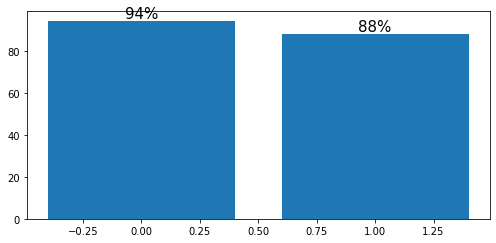

wooooo


In [54]:
import numpy as np
from matplotlib import pyplot as plt

m_viaf_p = round(m_viaf/men * 100)
f_viaf_p = round(f_viaf/women * 100)

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

frequencies = [m_viaf_p, f_viaf_p]

plt.figure()

p1 = plt.bar(np.arange(len(frequencies)), frequencies)

for rect1 in p1:
    height = rect1.get_height()
    plt.annotate( "{}%".format(height),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)

plt.show()
print("wooooo")

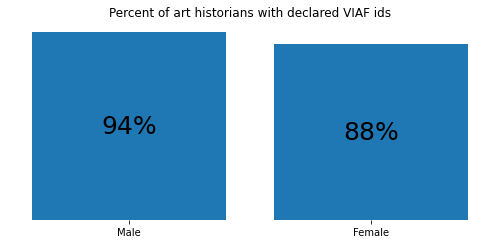

In [120]:

# code
import numpy as np
import matplotlib.pyplot as plt
  
# Marks of RAM in different subjects out of 100.
x = ['Male', 'Female']
y = [m_viaf_p, f_viaf_p]
  
plt.bar(x, y)

plt.title("Percent of art historians with declared VIAF ids")
for rect1 in p1:
    height = rect1.get_height()
    plt.annotate( "{}%".format(height),(rect1.get_x() + rect1.get_width()/2, height/2),ha="center",va="center",fontsize=25)

plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.yticks([])
plt.show()


In [23]:
#Note: I have tried to do the totals using the same code as the personal relationships, just changing to type of property
#but it doesn't work!!! It times out. Idk why??? also the viaf doesn't match the above: why?

from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

# prepare the query
my_SPARQL_query = """
# Make a list of the most used authority control properties for people for art historians by gender
SELECT ?propertyLabel ?genderLabel ?count WHERE {
  {
    select distinct?gender ?propertyclaim (COUNT(*) AS ?count) where {
      ?item wdt:P106/wdt:P279* wd:Q1792450  .
      ?item wdt:P31 wd:Q5 .
      ?item wdt:P21 ?gender .
      ?item ?propertyclaim [] .
    } group by ?propertyclaim ?gender
  }
  ?property wikibase:propertyType wikibase:ExternalId .
  ?property wdt:P31 wd:Q19595382 .
  ?property wikibase:claim ?propertyclaim .
  SERVICE wikibase:label {            # ... include the labels
    bd:serviceParam wikibase:language "en" .
  }
} ORDER BY DESC (?count)
#LIMIT 100
"""
# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(my_SPARQL_query)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
results = sparql_wd.query().convert()

# manipulate the result
for result in results["results"]["bindings"]:
    print(result["propertyLabel"]["value"], result["genderLabel"]["value"], result["count"]["value"])
print("👻")

VIAF ID male 11549
ISNI male 9641
WorldCat Identities ID male 9521
Library of Congress authority ID male 8597
GND ID male 8476
NUKAT ID male 7831
Nationale Thesaurus voor Auteurs ID male 7191
Bibliothèque nationale de France ID male 5737
VIAF ID female 5432
NKCR AUT ID male 5081
Deutsche Biographie (GND) ID male 4950
PLWABN ID male 4278
ISNI female 4027
WorldCat Identities ID female 3662
Library of Congress authority ID female 3494
SHARE Catalogue author ID male 3425
GND ID female 3420
Vatican Library VcBA ID male 3129
Unione Romana Biblioteche Scientifiche ID male 3093
NUKAT ID female 2994
American Academy in Rome ID male 2934
IxTheo authority ID male 2773
NORAF ID male 2581
Open Library ID male 2413
Nationale Thesaurus voor Auteurs ID female 2369
Bibliothèque nationale de France ID female 2213
National Library of Israel J9U ID male 2138
abART person ID male 2089
Vatican Library ID (former scheme) male 2033
CONOR.SI ID male 1803
NKCR AUT ID female 1746
Kallías ID male 1571
Deutsche Bi

### Phase 3: Professions and Occupations

Total number of other jobs

In [6]:
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

# prepare the query
number_jobs = """
SELECT ?genderLabel (COUNT(?job) AS ?count_job)
WHERE 
{ 

  ?human wdt:P21 ?gender
  ; wdt:P106 wd:Q1792450
  ; wdt:P106 ?job
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }

}
GROUP BY ?genderLabel
"""
# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(number_jobs)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
results = sparql_wd.query().convert()


male 27557
female 11080
non-binary 7
🍩


Data Manipulation

In [9]:
#Create CSV

with open('overview_jobs.csv', mode='w') as my_file:
    my_writer = csv.writer(my_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
    my_writer.writerow(["Gender", "Total Jobs"])
    for result in job_overview_results["results"]["bindings"]:
        my_writer.writerow([result["genderLabel"]["value"], result["count_job"]["value"].strip()])
        


df = pd.read_csv("overview_jobs.csv")

df.index = [
    "1",
    "2",
    "3"
]

Total= pd.Series(
    [11758, 5881, 2],
    index=['1', '2', '3'],
    name='Total'
)

df['Total Art Historian'] = Total 


#avarage number of job per Art Historian by gender

avarage_job = df['Total Jobs']/df['Total Art Historian']


Final_Value= (df['Total Art Historian'] / avarage_job)%100


df['Real Jobs'] = Final_Value

print(df)




       Gender  Total Jobs  Total Art Historian  Real Jobs
1        male       27562                11758  15.984471
2      female       11078                 5881  22.058224
3  non-binary           7                    2   0.571429


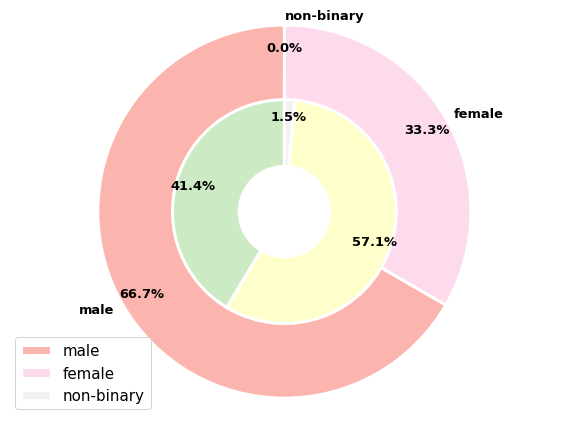

In [10]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Pie1 = df['Total Art Historian']

Pie2 = df['Real Jobs']

# Setting figure colors
cmap = plt.get_cmap("Pastel1")
outer_colors = cmap(np.arange(3)*7)
inner_colors = cmap(np.array([2,5,9]))

# Setting the size of the figure
plt.figure(figsize=(8,6))

# Plotting the outer pie
plt.pie(Pie1 , labels = df.iloc[0:3, 0], 
       startangle=90, pctdistance =0.88 ,colors=outer_colors,
       autopct = '%1.1f%%', radius= 1.0, labeldistance=1.05,
       textprops ={ 'fontweight': 'bold','fontsize':13},
       wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" } )

# PLotting the inner pie
plt.pie(Pie2,startangle=90, pctdistance =0.85,colors=inner_colors,
        autopct = '%1.1f%%',radius= 0.60,
        textprops ={'fontweight': 'bold' ,'fontsize':13}, 
        wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" } )

# Creating the donut shape for the pie
centre_circle = plt.Circle((0,0), 0.25, fc='white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle) # adding the centre circle

# Plotting the pie 
plt.axis('equal')  # equal aspect ratio
plt.legend( loc=3, fontsize =15)
plt.tight_layout()
plt.show()

*I'm not sure about this visualization, maybe I did something wrong in the data manipulation part. Additonally the inner pie looks weird and has no legend. I leave it here but we can delete it later.*


Top jobs for Male Art Historian

In [23]:
#QUERY MALE
from SPARQLWrapper import SPARQLWrapper, JSON, GET, POST, CSV
import csv 
import pandas as pd
import requests
import json
import ssl
import numpy as np
import pandas as pd
import string
import networkx as nx
import matplotlib.pyplot as plt
import ssl
import plotly.express as px

ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

# prepare the query
male_job_list = """

SELECT ?jobLabel (COUNT(?human) AS ?tot)

WHERE 
{ 
  ?human wdt:P21 wd:Q6581097
  ; wdt:P106 wd:Q1792450
  ; wdt:P106 ?job
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
GROUP BY ?jobLabel 
ORDER BY DESC(?tot)
LIMIT 21
"""

# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(male_job_list)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
male_job_list_result = sparql_wd.query().convert()


##Visualization Male Job List

In [24]:
from SPARQLWrapper import SPARQLWrapper, JSON, GET, POST, CSV
import csv 
import pandas as pd
import requests
import json
import numpy as np
import string
import networkx as nx
import matplotlib.pyplot as plt
import ssl
import pandas as pd
import pandas_profiling as pp
import seaborn as sns



with open('male_jobs.csv', mode='w') as my_file:
    my_writer = csv.writer(my_file, delimiter=',', quoting=csv.QUOTE_ALL)
    # write the column names
    my_writer.writerow(['Job', 'Total'])
    for result in male_job_list_result ["results"]["bindings"]:
        my_writer.writerow([result["jobLabel"]["value"], result["tot"]["value"].strip()])
        


# parse the csv into a dataframe
df = pd.read_csv("male_jobs.csv")

# eliminate the 'art historian' row
df= df.drop([0])

# print the first 10 rows
df.head(20)

fig = px.bar(df, x="Total", y="Job", orientation='h', color="Job",)
fig.update_layout(legend={"itemclick":False})

fig.show()



## Top jobs for female art historian

In [25]:
#QUERY FEMALE
from SPARQLWrapper import SPARQLWrapper, JSON, GET, POST, CSV
import csv 
import pandas as pd
import requests
import json
import ssl
import numpy as np
import pandas as pd
import string
import networkx as nx
import matplotlib.pyplot as plt
import ssl



ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

# prepare the query
female_job_list = """

SELECT ?jobLabel (COUNT(?human) AS ?tot)

WHERE 
{ 
  ?human wdt:P21 wd:Q6581072 
  ; wdt:P106 wd:Q1792450
  ; wdt:P106 ?job
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
GROUP BY ?jobLabel 
ORDER BY DESC(?tot)
LIMIT 21
"""

# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(female_job_list)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
female_job_list_result = sparql_wd.query().convert()



Visualization 

In [26]:
#create CSV
with open('female_jobs.csv', mode='w') as my_file:
    my_writer = csv.writer(my_file, delimiter=',', quoting=csv.QUOTE_ALL)
    # write the column names
    my_writer.writerow(['Job', 'Total'])
    for result in female_job_list_result ["results"]["bindings"]:
        my_writer.writerow([result["jobLabel"]["value"], result["tot"]["value"].strip()])
        


# parse the csv into a dataframe
df = pd.read_csv("female_jobs.csv")

# eliminate the 'art historian' row
df= df.drop([0])

# print the first 10 rows
df.head(20)


fig = px.bar(df, x="Total", y="Job", orientation='h', color="Job")
fig.update_layout(legend={"itemclick":False})

fig.show()



## Top jobs for non binary art historians

I don't think this query is useful. Numerically and Visually speaking this data can be see as outliers. Plus there's not intrest in a graph where the totals are = to 1 and based on only one/two persons.

In [17]:
#QUERY NON BINARY
from SPARQLWrapper import SPARQLWrapper, JSON, GET, POST, CSV
import csv 
import pandas as pd
import requests
import json
import ssl
import numpy as np
import pandas as pd
import string
import networkx as nx
import matplotlib.pyplot as plt
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

# prepare the query
non_binary_job_list = """

SELECT ?jobLabel (COUNT(?human) AS ?tot)

WHERE 
{ 
  ?human wdt:P21 wd:Q48270 
  ; wdt:P106 wd:Q1792450
  ; wdt:P106 ?job
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
GROUP BY ?jobLabel 
ORDER BY DESC(?tot)
LIMIT 21
"""

# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(non_binary_job_list)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
non_binary_job_list_result = sparql_wd.query().convert()


with open('non_binary_jobs.csv', mode='w') as my_file:
    my_writer = csv.writer(my_file, delimiter=',', quoting=csv.QUOTE_ALL)
    # write the column names
    my_writer.writerow(['Job', 'Total'])
    for result in non_binary_job_list_result ["results"]["bindings"]:
        my_writer.writerow([result["jobLabel"]["value"], result["tot"]["value"].strip()])
        


# parse the csv into a dataframe
df = pd.read_csv("non_binary_jobs.csv")

# print the first 10 rows
df.head(10)





,Job,Total
0,writer,1
1,professor,1
2,art historian,1
3,journalist,1
4,film critic,1
5,literary critic,1
6,essayist,1


ACADEMIC INFORMATIONS
It is clear that both man and women after art historian is university teacher. Additionaly in the female art historian's job list we can see some other taching-related jobs, namely: teacher, professor, academic and researcher. So we wanted to take a look at the property related to education for both genders with a focus on which degree is listed on their wikidata page.

In [17]:
ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

# prepare the query
Academic_Degree = """
SELECT ?genderLabel (COUNT(?human) as ?degreecount)
WHERE
{ 
  ?human wdt:P31 wd:Q5
  ; wdt:P21 ?gender
  ; wdt:P106/wdt:P279* wd:Q1792450 
  ; wdt:P512 ?degree.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}

GROUP BY (?genderLabel)
ORDER BY ?genderLabel
"""

# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(Academic_Degree)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
Academic_Degree_result = sparql_wd.query().convert()

#Create csv file
with open('degree.csv', mode='w') as my_file:
    my_writer = csv.writer(my_file, delimiter=',', quoting=csv.QUOTE_ALL)
    # write the column names
    my_writer.writerow(['Art Historian Gender', 'Degree Total'])
    for result in Academic_Degree_result["results"]["bindings"]:
        my_writer.writerow([result["genderLabel"]["value"],result["degreecount"]["value"].strip()])

# parse the csv into a dataframe
dfd = pd.read_csv("degree.csv")


# print 
dfd.head()


,Art Historian Gender,Degree Total
0,female,463
1,male,908
2,non-binary,3


In [18]:
ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

# prepare the query
Doctorate = """SELECT ?genderLabel (COUNT(?human) as ?doctoratecount)
WHERE
{ 
  ?human wdt:P31 wd:Q5
  ; wdt:P21 ?gender
  ; wdt:P106/wdt:P279* wd:Q1792450 
  ; wdt:P512 ?degree.
  ?degree wdt:P279 wd:Q3529618
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}

GROUP BY (?genderLabel)
ORDER BY ?genderLabel
"""

# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(Doctorate)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
Doctorate_result = sparql_wd.query().convert()

#Create csv file
with open('doctorate.csv', mode='w') as my_file:
    my_writer = csv.writer(my_file, delimiter=',', quoting=csv.QUOTE_ALL)
    # write the column names
    my_writer.writerow(['Art Historian Gender', 'Doctorate Total'])
    for result in Doctorate_result["results"]["bindings"]:
        my_writer.writerow([result["genderLabel"]["value"],result["doctoratecount"]["value"].strip()])

# parse the csv into a dataframe
dfdd = pd.read_csv("doctorate.csv")

# print 
dfdd.head()

,Art Historian Gender,Doctorate Total
0,female,125
1,male,371


In [19]:
ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

# prepare the query
Professor = """SELECT ?genderLabel (COUNT(?property) AS ?count) 
WHERE
{
      ?item wdt:P106/wdt:P279* wd:Q1792450  .
      ?item wdt:P31 wd:Q5 .
      ?item wdt:P21 ?gender .
      ?item ?propertyclaim [] .
      ?property wdt:P31 wd:Q107211056.
    ?property wikibase:claim ?propertyclaim .
  
      SERVICE wikibase:label {            # ... include the labels
    bd:serviceParam wikibase:language "en" .
  }
 }

GROUP BY ?genderLabel
ORDER BY ?genderLabel
"""

# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(Professor)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
Professor_result = sparql_wd.query().convert()

#Create csv file
with open('professor.csv', mode='w') as my_file:
    my_writer = csv.writer(my_file, delimiter=',', quoting=csv.QUOTE_ALL)
    # write the column names
    my_writer.writerow(['Art Historian Gender', 'Professor Total'])
    for result in Professor_result["results"]["bindings"]:
        my_writer.writerow([result["genderLabel"]["value"],result["count"]["value"].strip()])

# parse the csv into a dataframe
dfp = pd.read_csv("professor.csv")

# print 
dfp.head()

,Art Historian Gender,Professor Total
0,female,25
1,male,200


Manipulate Data

In [20]:
doctorate=dfdd['Doctorate Total']
professor=dfp['Professor Total']

dfd['Doctorate Total']= doctorate
dfd['Professor Total']= professor

#delete non-binary
dfd=dfd.drop(2)

print(dfd)

  Art Historian Gender  Degree Total  Doctorate Total  Professor Total
0               female           463            125.0             25.0
1                 male           908            371.0            200.0


Visualization

In [21]:
import plotly.express as px
dfd = px.data.tips()

fig = px.histogram(dfd, x='Art Historian Gender', y='Doctorate Total',
             color='smoker', barmode='group',
             histfunc='avg',
             height=400)
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'] but received: Art Historian Gender


### Phase 4: Personal Relationships
Are men or women more likely to have personal relationships listed? What kinds of relationships appear?

Below query shows all personal relationship properties and how often they're used. I think it's super weird that "relative" is used exclusively in women's profiles.

In [20]:
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

# prepare the query
my_SPARQL_query = """
# Make a list of the most used authority control properties for people for art historians by gender
SELECT ?propertyLabel ?genderLabel ?count WHERE {
  {
    select distinct?gender ?propertyclaim (COUNT(*) AS ?count) where {
      ?item wdt:P106/wdt:P279* wd:Q1792450  .
      ?item wdt:P31 wd:Q5 .
      ?item wdt:P21 ?gender .
      ?item ?propertyclaim [] .
    } group by ?propertyclaim ?gender
  }
  #?property wikibase:propertyType wikibase:ExternalId .
  ?property wdt:P31 wd:Q22964231 .
  ?property wikibase:claim ?propertyclaim .
  SERVICE wikibase:label {            # ... include the labels
    bd:serviceParam wikibase:language "en" .
  }
} ORDER BY DESC (?count)
#LIMIT 100
"""
# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(my_SPARQL_query)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
results = sparql_wd.query().convert()

# manipulate the result
for result in results["results"]["bindings"]:
    print(result["propertyLabel"]["value"], result["genderLabel"]["value"], result["count"]["value"])
print("👶")

child male 798
father male 736
sibling male 624
spouse male 591
spouse female 378
father female 241
mother male 213
child female 161
relative male 156
sibling female 132
mother female 102
relative female 40
number of children male 30
unmarried partner male 23
number of children female 16
unmarried partner female 4
stepparent male 2
godparent male 1
godparent female 1
number of children non-binary 1
👶


In [14]:
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

# prepare the query
my_SPARQL_query = """
select ?keyLabel  (count(*) as ?count) where { 
    ?item wdt:P106/wdt:P279* wd:Q1792450  .
      ?item wdt:P31 wd:Q5 .
      ?item wdt:P21 ?gender .
      ?item ?propertyclaim [] .
      ?property wikibase:claim ?propertyclaim .
      ?property wdt:P31 wd:Q22964231 .
  SERVICE wikibase:label {            # ... include the labels
    bd:serviceParam wikibase:language "en" .
  }

    bind (coalesce(?totals, ?gender) as ?key)
} group by ?keyLabel
"""
# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(my_SPARQL_query)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
results = sparql_wd.query().convert()

# manipulate the result
for result in results["results"]["bindings"]:
    print(result["keyLabel"]["value"], result["count"]["value"])
print("🍕")

print(results)

prm = int(results["results"]["bindings"][0]['count']['value'])
prf = int(results["results"]["bindings"][1]['count']['value'])
prnb = int(results["results"]["bindings"][2]['count']['value'])

male 3177
female 1080
non-binary 1
🍕
{'head': {'vars': ['keyLabel', 'count']}, 'results': {'bindings': [{'keyLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'male'}, 'count': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '3177'}}, {'keyLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'female'}, 'count': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '1080'}}, {'keyLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'non-binary'}, 'count': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '1'}}]}}


In [22]:
#visualization
#basic math to get average number of declared personal relationships per art historian of each gender
prmf = prm/men
prff = prf/women
prfnb = prnb/nb

print("average number of personal relationships declared by gender")
print("male", prmf)
print("female", prff)
print("nonbinary", prfnb)

average number of personal relationships declared by gender
male 0.27019901343765945
female 0.1836422377146744
nonbinary 0.5


## visualization of the personal relationships
idea: network visualization: pixelated magritte and then some sort of humanoid shape coming off of them Even better would be something that can show the different types of relationships (emojis?)

# Phase 4.1: Academic Relationships: 

Query to see if there is any significant difference in the academic interaction between art historians depending on gender. 

In [44]:
ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

# prepare the query
Academic_Relationship = """

SELECT ?historiangenderLabel ?studentgenderLabel (count(?student) as ?numberstudent)
WHERE
{
?historian wdt:P31 wd:Q5
; wdt:P21 ?historiangender
; wdt:P106/wdt:P279* wd:Q1792450
; wdt:P185 ?student.
?student wdt:P21 ?studentgender
 SERVICE wikibase:label {            # ... include the labels
    bd:serviceParam wikibase:language "en" .
  }
}



GROUP BY ?studentgenderLabel ?historiangenderLabel
"""
# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(Academic_Relationship)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
Academic_Relationship_results = sparql_wd.query().convert()

#Create csv file
with open('academic_relationship.csv', mode='w') as my_file:
    my_writer = csv.writer(my_file, delimiter=',', quoting=csv.QUOTE_ALL)
    # write the column names
    my_writer.writerow(['Student Gendes','Art Historian Gender', 'Total'])
    for result in Academic_Relationship_results ["results"]["bindings"]:
        my_writer.writerow([result["studentgenderLabel"]["value"], result["historiangenderLabel"]["value"], result["numberstudent"]["value"].strip()])

# parse the csv into a dataframe
df = pd.read_csv("academic_relationship.csv")

# print 
df.head()


,Student Gendes,Art Historian Gender,Total
0,female,male,88
1,male,male,161
2,female,female,16
3,male,female,21
4,female,non-binary,4


In [ ]:
#querey for list of all academic properties with counts and gender
SELECT ?propertyLabel ?genderLabel ?count WHERE {
  {
    select distinct?gender ?propertyclaim (COUNT(*) AS ?count) where {
      ?item wdt:P106/wdt:P279* wd:Q1792450  .
      ?item wdt:P31 wd:Q5 .
      ?item wdt:P21 ?gender .
      ?item ?propertyclaim [] .
    } group by ?propertyclaim ?gender
  }
  #?property wikibase:propertyType wikibase:ExternalId .
  ?property wdt:P31 wd:Q22984450.
  ?property wikibase:claim ?propertyclaim .
  SERVICE wikibase:label {            # ... include the labels
    bd:serviceParam wikibase:language "en" .
  }
} ORDER BY DESC (?count)

In [ ]:
# Make a list of the most used educational + personal properties for art historians by gender
#problem with this query is I'm not exactly sure what it's counting: is it #OF DECLARATIONS?? [I THINK SO???] #of people with that property?
SELECT ?property ?propertyLabel ?genderLabel ?count WHERE {
  {
    select distinct?gender ?propertyclaim (COUNT(*) AS ?count) where {
      ?item wdt:P106/wdt:P279* wd:Q1792450  .
      ?item wdt:P31 wd:Q5 .
      ?item wdt:P21 ?gender .
      ?item ?propertyclaim [] .
    } group by ?propertyclaim ?gender
  }
  #?property wikibase:propertyType wikibase:ExternalId .
  ?property wdt:P31 wd:Q22984450.
  ?property wdt:P31 wd:Q18608871.
  ?property wikibase:claim ?propertyclaim .
  SERVICE wikibase:label {            # ... include the labels
    bd:serviceParam wikibase:language "en" .
  }
} ORDER BY DESC (?count)

In [ ]:
#query for totaling the above query by gender
select ?keyLabel  (count(*) as ?count) where { 
    ?item wdt:P106/wdt:P279* wd:Q1792450  .
      ?item wdt:P31 wd:Q5 .
      ?item wdt:P21 ?gender .
      ?item ?propertyclaim [] .
      ?property wdt:P31 wd:Q22984450.
  ?property wdt:P31 wd:Q18608871.
      ?property wikibase:claim ?propertyclaim .
      
  SERVICE wikibase:label {            # ... include the labels
    bd:serviceParam wikibase:language "en" .
  }
    bind (coalesce(?totals, ?gender) as ?key)
} group by ?keyLabel

## Visualization for this one
I think a good visualization for this would be a comparison with the personal relationships rather than this one solo.
A network image of the average female art historian and the average male art historian surrounded by their personal and professional relationships would be a good concluding image I think.